In [1]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.max_colwidth', None)
import yfinance as yf
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

import pandas as pd
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot

<ipython-input-1-23e6bb2a27b5>:14: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


In [ ]:
sentiment = pd.read_csv('sentiment_daily.csv')
merge1 = sentiment[49:]

In [3]:
financial = pd.read_csv('coin_Bitcoin.csv')
financial["Date"] = pd.to_datetime(financial["Date"]).dt.date
merge2 = financial[:2849]

In [4]:
financial["Volatility"] = ((financial["High"] - financial["Low"]) / financial["Low"]) * 100
financial



,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap,Volatility
0,1,Bitcoin,BTC,2013-04-29,147.488007,134.000000,134.444000,144.539993,0.000000e+00,1.603769e+09,10.065677
1,2,Bitcoin,BTC,2013-04-30,146.929993,134.050003,144.000000,139.000000,0.000000e+00,1.542813e+09,9.608347
2,3,Bitcoin,BTC,2013-05-01,139.889999,107.720001,139.000000,116.989998,0.000000e+00,1.298955e+09,29.864461
3,4,Bitcoin,BTC,2013-05-02,125.599998,92.281898,116.379997,105.209999,0.000000e+00,1.168517e+09,36.104697
4,5,Bitcoin,BTC,2013-05-03,108.127998,79.099998,106.250000,97.750000,0.000000e+00,1.085995e+09,36.697851
...,...,...,...,...,...,...,...,...,...,...,...
2857,2858,Bitcoin,BTC,2021-02-23,54204.929756,45290.590268,54204.929756,48824.426869,1.061025e+11,9.099259e+11,19.682542
2858,2859,Bitcoin,BTC,2021-02-24,51290.136695,47213.498162,48835.087661,49705.333316,6.369552e+10,9.263931e+11,8.634477
2859,2860,Bitcoin,BTC,2021-02-25,51948.966982,47093.853019,49709.082425,47093.853019,5.450657e+10,8.777661e+11,10.309443
2860,2861,Bitcoin,BTC,2021-02-26,48370.785260,44454.842114,47180.464054,46339.760083,3.509679e+11,8.637523e+11,8.808811


In [ ]:
merge1 = merge1.reset_index(drop=True)
merge1
merge2 = merge2.reset_index(drop=True)
merge2
df = pd.concat((merge1, merge2), axis=1)

df.to_csv("arima_sentiment.csv", header=True, index=False, columns=list(df.axes[1]))


# ARIMA model with sentiment

In [ ]:
df = pd.read_csv("arima_sentiment.csv", parse_dates=['date'])
df
arima_df = df[['Compound Sentiment Score','sentiment change', 'Close', 'Date', 'Volume', 'Volatility']]
arima_df

C:\Users\filip\Coding\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\filip\Coding\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params av

                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                 2861
Model:                 ARIMA(3, 1, 4)   Log Likelihood              -21214.428
Method:                       css-mle   S.D. of innovations            401.706
Date:                Mon, 09 Aug 2021   AIC                          42446.856
Time:                        19:24:06   BIC                          42500.487
Sample:                             1   HQIC                         42466.194
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            81.5533        nan        nan        nan         nan         nan
ar.L1.D.Close    -0.2316      0.012    -19.665      0.000      -0.255      -0.209
ar.L2.D.Close     0.2417      0.008     

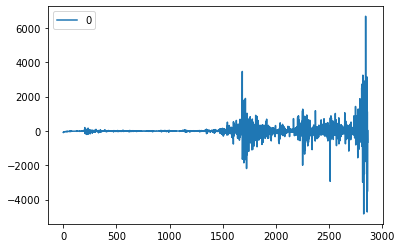

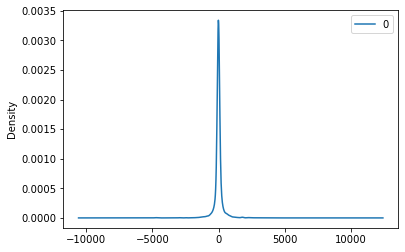

                 0
count  2861.000000
mean     -1.508434
std     401.776223
min   -4836.943777
25%     -30.881798
50%      -8.347085
75%      21.042145
max    6680.200531


In [14]:
from statsmodels.tsa.arima_model import ARIMA 

model = ARIMA(financial['Close'], order=(3,1,4))
model
# model = ARIMA(df, order=(5,1,0))
model_fit = model.fit()
print(model_fit.summary())

# # plot residual errors
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
residuals.plot(kind='kde')
pyplot.show()
print(residuals.describe())

# residuals = pd.DataFrame(model_fit.resid)
# residuals.plot()
# pyplot.show()
# residuals.plot(kind='kde')
# pyplot.show()
# print(residuals.describe())

In [17]:
import math
trainScore_RMSE = math.sqrt(mean_squared_error(trainY, trainPredict))
testScore_RMSE = math.sqrt(mean_squared_error(testY, testPredict))

NameError: name 'trainY' is not defined

In [12]:
financial

from pmdarima.arima import auto_arima

model = auto_arima(
    y = financial.Close,
    start_p=1,
    start_q=1,
    test="adf",
    max_p=6,
    max_q=6,
    m=1,  # frequency of series
    d=None,  # determine 'd'
    seasonal=False,  # no seasonality
    trace=True,
    stepwise=True,
)



Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=42528.469, Time=1.97 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=42540.292, Time=0.09 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=42536.605, Time=0.10 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=42536.701, Time=0.24 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=42542.708, Time=0.04 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=42539.216, Time=1.13 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=42539.771, Time=1.02 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=42538.601, Time=0.34 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=42538.333, Time=0.12 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=42525.502, Time=3.55 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=42524.006, Time=1.06 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=42518.411, Time=0.67 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=42528.261, Time=0.16 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=42514.984, Time=0.72 sec
 ARIMA(4,1,0)(0,0,0

In [15]:
model_fit = model.fit()
print(model_fit.summary())

C:\Users\filip\Coding\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\filip\Coding\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                     

                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                 2861
Model:                 ARIMA(3, 1, 4)   Log Likelihood              -21214.428
Method:                       css-mle   S.D. of innovations            401.706
Date:                Mon, 09 Aug 2021   AIC                          42446.856
Time:                        19:25:53   BIC                          42500.487
Sample:                             1   HQIC                         42466.194
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            81.5533        nan        nan        nan         nan         nan
ar.L1.D.Close    -0.2316      0.012    -19.665      0.000      -0.255      -0.209
ar.L2.D.Close     0.2417      0.008     

C:\Users\filip\Coding\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:1521: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(np.diag(-inv(hess)))
